In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv(r"C:\Users\user\Desktop\MAX\daily_data.csv", parse_dates = ['DATE'], na_values=['s', 'T', 'M'])
df.head()

,STATION,DATE,REPORT_TYPE,SOURCE,BackupElements,BackupElevation,BackupEquipment,BackupLatitude,BackupLongitude,BackupName,...,DailyPeakWindDirection,DailyPeakWindSpeed,DailyPrecipitation,DailySnowDepth,DailySnowfall,DailySustainedWindDirection,DailySustainedWindSpeed,Sunrise,Sunset,WindEquipmentChangeDate
0,72518014735,2015-01-01 23:59:00,SOD,6,PRECIP,260,PLASTIC,42.6918,-73.83109,"NWS ALBANY, NY",...,190.0,26.0,0.00,0.0,0.0,190.0,20.0,726.0,1632.0,2006-09-08
1,72518014735,2015-01-02 23:59:00,SOD,6,PRECIP,260,PLASTIC,42.6918,-73.83109,"NWS ALBANY, NY",...,250.0,30.0,NaN,0.0,NaN,310.0,23.0,726.0,1633.0,2006-09-08
2,72518014735,2015-01-03 23:59:00,SOD,6,PRECIP,260,PLASTIC,42.6918,-73.83109,"NWS ALBANY, NY",...,170.0,21.0,0.57,0.0,1.6,160.0,15.0,726.0,1634.0,2006-09-08
3,72518014735,2015-01-04 23:59:00,SOD,6,PRECIP,260,PLASTIC,42.6918,-73.83109,"NWS ALBANY, NY",...,290.0,33.0,0.22,1.0,0.0,290.0,24.0,726.0,1635.0,2006-09-08
4,72518014735,2015-01-05 23:59:00,SOD,6,PRECIP,260,PLASTIC,42.6918,-73.83109,"NWS ALBANY, NY",...,280.0,42.0,NaN,0.0,NaN,290.0,32.0,726.0,1636.0,2006-09-08


In [13]:
df.describe()

,STATION,DATE,SOURCE,BackupElevation,BackupLatitude,BackupLongitude,DailyAverageDewPointTemperature,DailyAverageDryBulbTemperature,DailyAverageRelativeHumidity,DailyAverageSeaLevelPressure,...,DailyMinimumDryBulbTemperature,DailyPeakWindDirection,DailyPeakWindSpeed,DailyPrecipitation,DailySnowDepth,DailySnowfall,DailySustainedWindDirection,DailySustainedWindSpeed,Sunrise,Sunset
count,2.668000e+03,2668,2668.0,2668.0,2668.000000,2668.000000,2668.000000,2668.000000,2668.000000,2668.000000,...,2668.000000,2668.000000,2668.000000,2116.000000,2580.000000,2344.000000,2668.000000,2668.000000,2668.000000,2668.000000
mean,7.251801e+10,2018-10-01 14:07:27.346326784,6.0,260.0,42.689750,-73.828268,38.217766,50.107571,66.085082,30.031945,...,40.299100,222.387556,25.513493,0.140165,0.573256,0.158447,223.924288,19.023238,563.145427,1783.491004
min,7.251801e+10,2015-01-01 23:59:00,6.0,260.0,42.681200,-73.831090,-19.000000,-3.000000,24.000000,29.240000,...,-13.000000,10.000000,6.000000,0.000000,0.000000,0.000000,10.000000,5.000000,416.000000,1621.000000
25%,7.251801e+10,2016-11-29 17:59:00,6.0,260.0,42.691800,-73.831090,24.000000,35.000000,57.000000,29.880000,...,27.000000,170.000000,19.000000,0.000000,0.000000,0.000000,170.000000,14.000000,447.000000,1658.000000
50%,7.251801e+10,2018-10-02 11:59:00,6.0,260.0,42.691800,-73.831090,38.000000,51.000000,66.000000,30.020000,...,40.000000,260.000000,24.000000,0.000000,0.000000,0.000000,270.000000,18.000000,547.000000,1805.000000
75%,7.251801e+10,2020-08-03 05:59:00,6.0,260.0,42.691800,-73.831090,55.000000,67.000000,76.000000,30.180000,...,55.250000,290.000000,31.000000,0.140000,0.000000,0.000000,290.000000,23.000000,650.000000,1905.000000
max,7.251801e+10,2022-05-31 23:59:00,6.0,260.0,42.691800,-73.816500,73.000000,87.000000,100.000000,30.740000,...,77.000000,360.000000,70.000000,3.920000,19.000000,19.700000,360.000000,67.000000,726.000000,1938.000000
std,0.000000e+00,NaN,0.0,0.0,0.004187,0.005764,19.116250,18.747310,13.401359,0.223771,...,18.122395,90.828564,9.436276,0.300864,1.953626,0.961480,90.846564,6.942113,108.536855,111.230222


In [14]:
df['Month'] = df['DATE'].dt.month
Month_Totals = df.groupby('Month').agg({'DailyAverageDryBulbTemperature': 'mean', 'DailyPrecipitation': 'sum'})
print(Month_Totals)

       DailyAverageDryBulbTemperature  DailyPrecipitation
Month                                                    
1                           25.202429               18.36
2                           29.705584               19.94
3                           36.434959               18.76
4                           47.587500               27.35
5                           60.750000               20.62
6                           68.545455               26.96
7                           73.830986               35.11
8                           72.060185               29.82
9                           64.980952               28.02
10                          53.101852               30.46
11                          40.162679               19.91
12                          32.410138               21.28


In [15]:
avg_daily_temperatuure = df.groupby('DATE')['DailyAverageDryBulbTemperature'].mean()
print(avg_daily_temperatuure)

DATE
2015-01-01 23:59:00    25.0
2015-01-02 23:59:00    32.0
2015-01-03 23:59:00    27.0
2015-01-04 23:59:00    39.0
2015-01-05 23:59:00    27.0
                       ... 
2022-05-27 23:59:00    70.0
2022-05-28 23:59:00    68.0
2022-05-29 23:59:00    66.0
2022-05-30 23:59:00    72.0
2022-05-31 23:59:00    79.0
Name: DailyAverageDryBulbTemperature, Length: 2668, dtype: float64


In [19]:
extreme_temperature_days = df[df['DailyMaximumDryBulbTemperature'] > 90]
print(extreme_temperature_days[['DATE', 'DailyMaximumDryBulbTemperature']])

                    DATE  DailyMaximumDryBulbTemperature
171  2015-07-19 23:59:00                            91.0
180  2015-07-28 23:59:00                            93.0
181  2015-07-29 23:59:00                            95.0
200  2015-08-18 23:59:00                            91.0
220  2015-09-07 23:59:00                            92.0
...                  ...                             ...
1986 2020-07-19 23:59:00                            93.0
1994 2020-07-27 23:59:00                            93.0
2331 2021-06-29 23:59:00                            92.0
2657 2022-05-21 23:59:00                            91.0
2667 2022-05-31 23:59:00                            92.0

[61 rows x 2 columns]


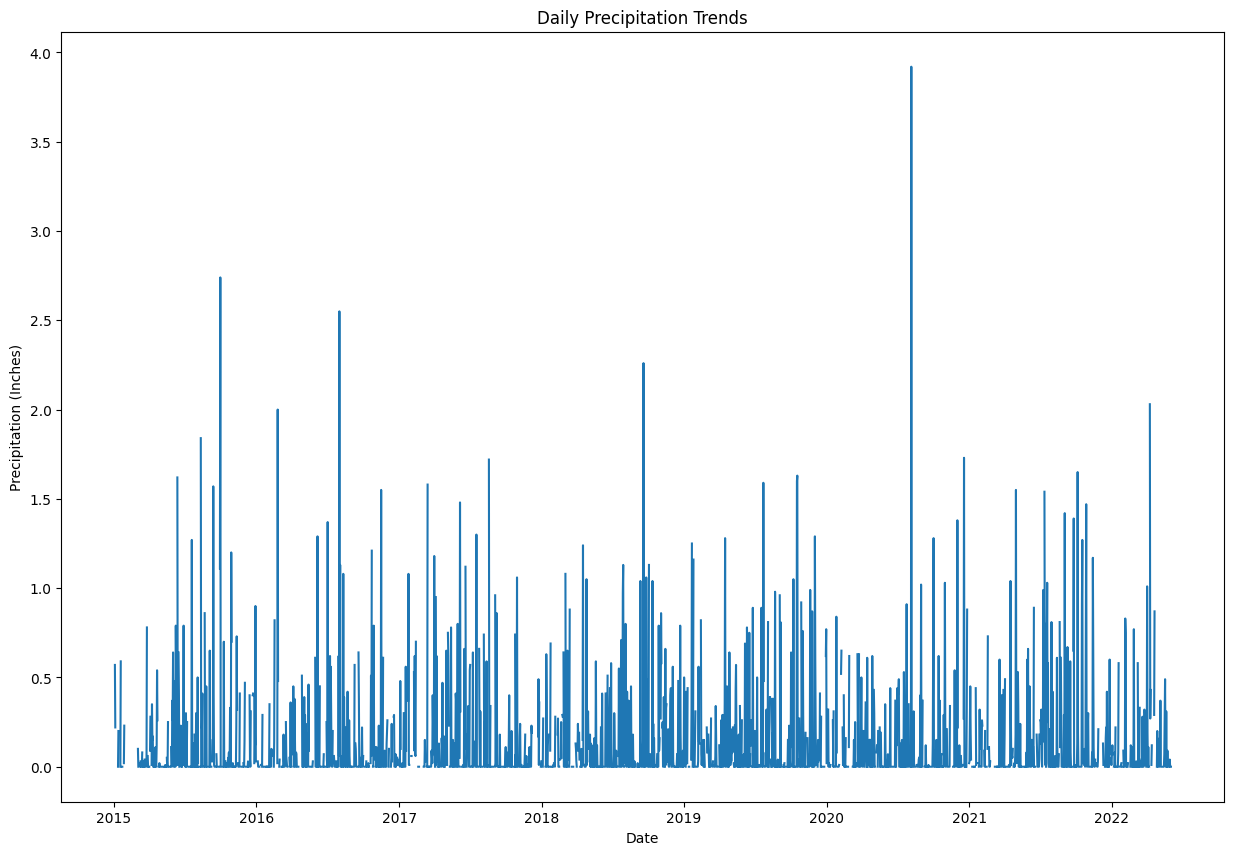

In [22]:
plt.figure(figsize = (15, 10))
plt.plot(df['DATE'], df['DailyPrecipitation'])
plt.title('Daily Precipitation Trends')
plt.xlabel('Date')
plt.ylabel('Precipitation (Inches)')
plt.show()

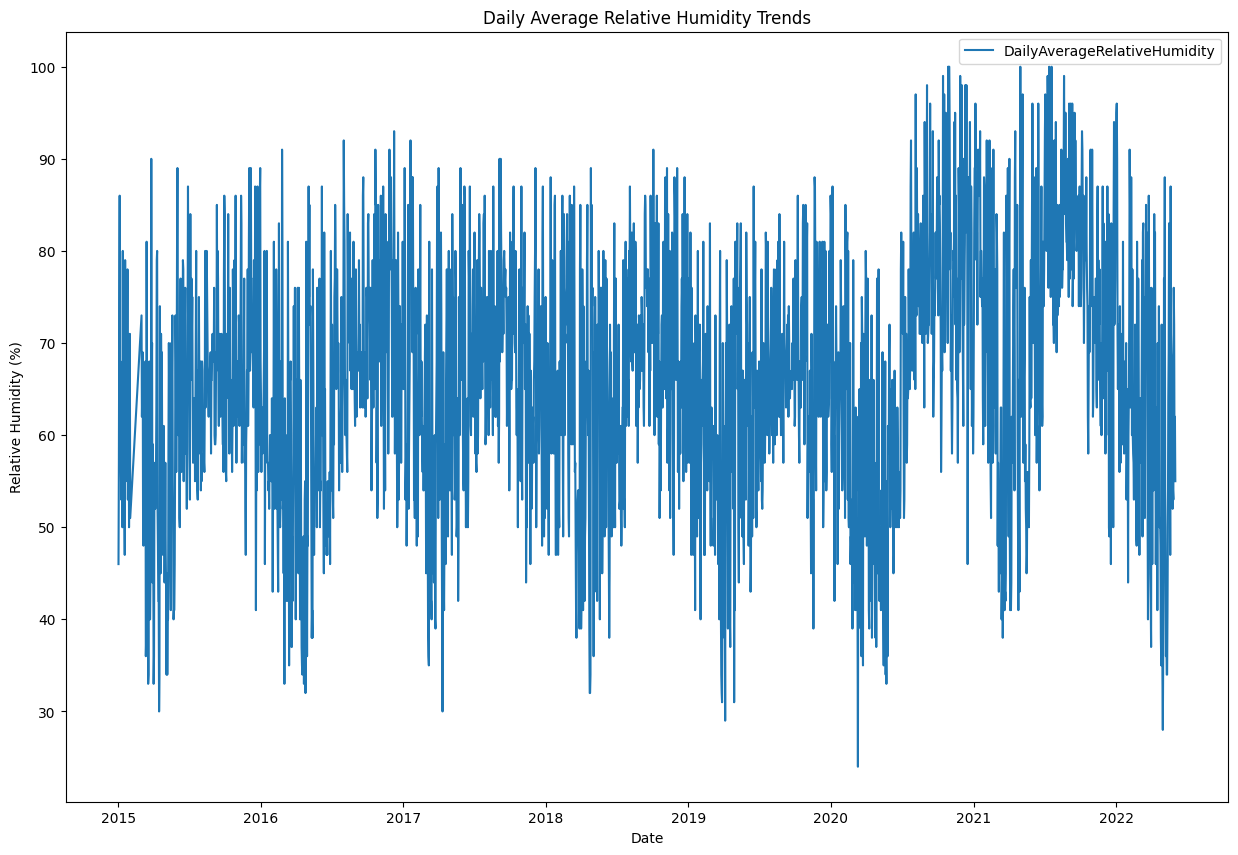

In [24]:
plt.figure(figsize = (15, 10))
plt.plot(df['DATE'], df['DailyAverageRelativeHumidity'], label = 'DailyAverageRelativeHumidity')
plt.title('Daily Average Relative Humidity Trends')
plt.xlabel('Date')
plt.ylabel('Relative Humidity (%)')
plt.legend()
plt.show()

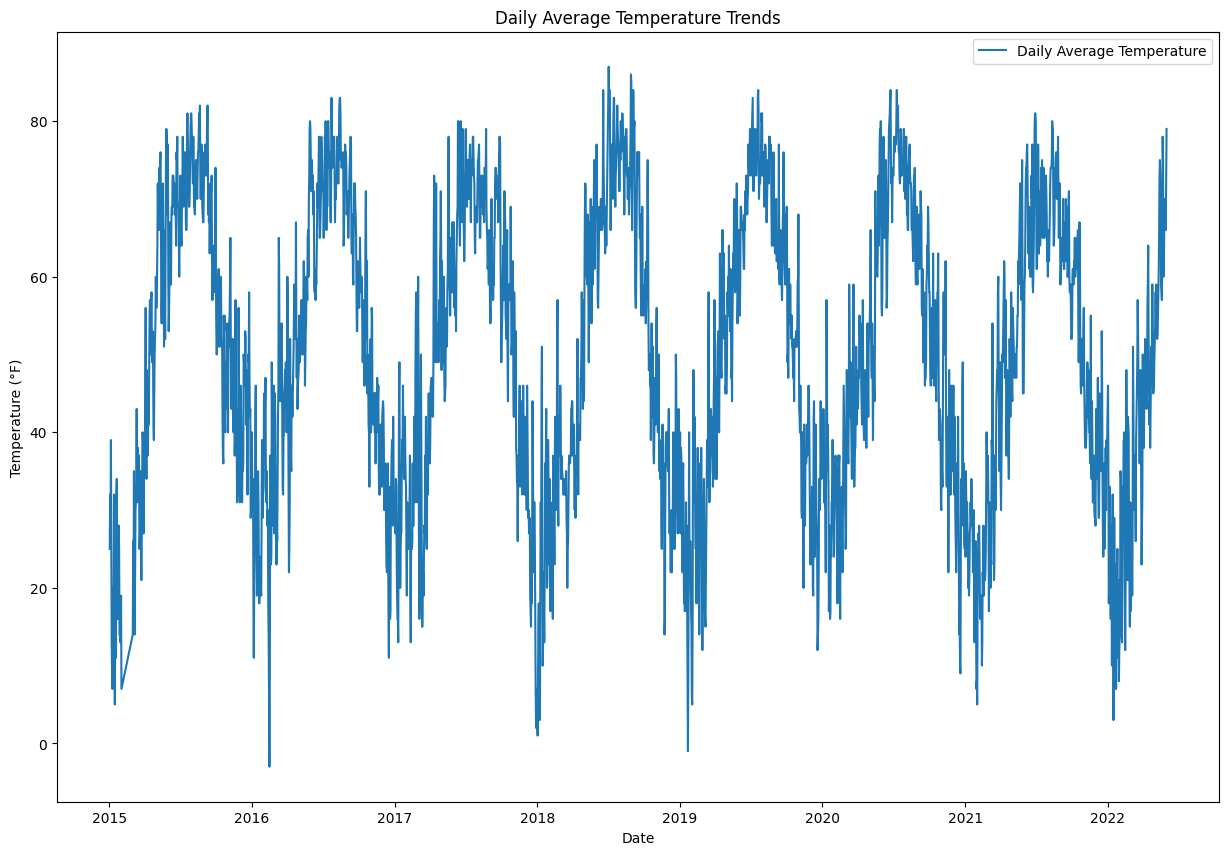

In [25]:
plt.figure(figsize = (15, 10))
plt.plot(df['DATE'], df['DailyAverageDryBulbTemperature'], label='Daily Average Temperature')
plt.title('Daily Average Temperature Trends')
plt.xlabel('Date')
plt.ylabel('Temperature (°F)')
plt.legend()
plt.show()

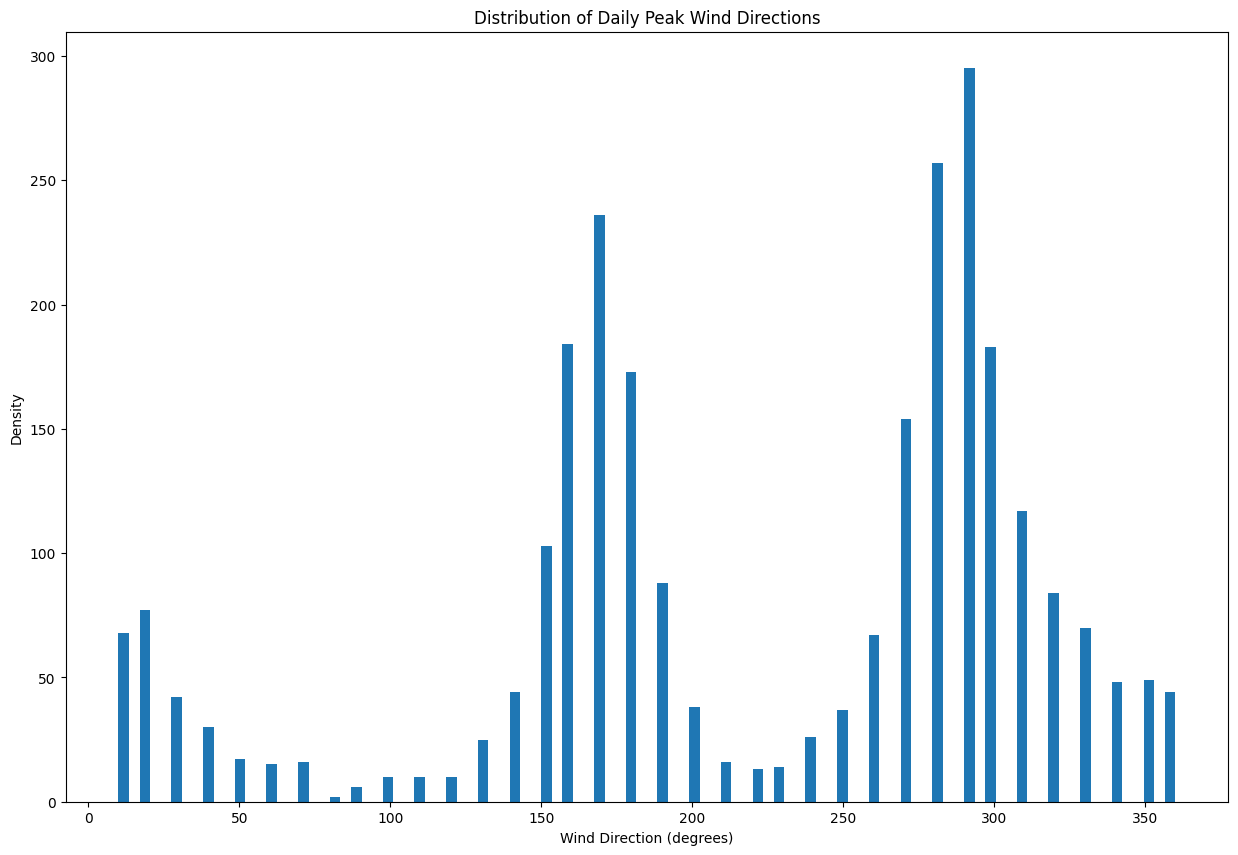

In [31]:
plt.figure(figsize = (15, 10))
plt.hist(df['DailyPeakWindDirection'], bins = 100)
plt.title('Distribution of Daily Peak Wind Directions')
plt.xlabel('Wind Direction (degrees)')
plt.ylabel('Density')
plt.show()

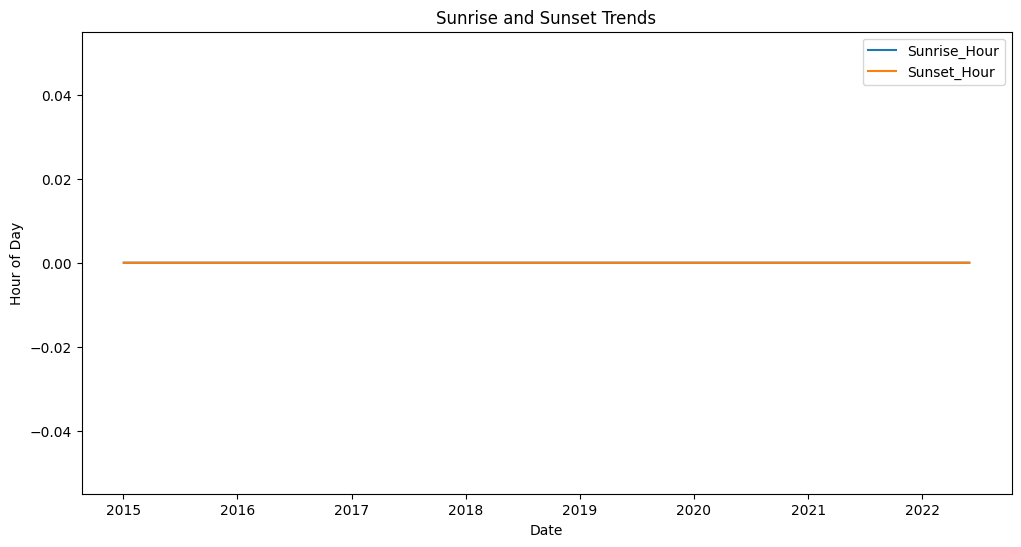

In [33]:
df['Sunrise'] = pd.to_datetime(df['Sunrise'], errors = 'coerce')
df['Sunset'] = pd.to_datetime(df['Sunset'], errors = 'coerce')

df['Sunrise_Hour'] = df['Sunrise'].dt.hour
df['Sunset_Hour'] = df['Sunset'].dt.hour

plt.figure(figsize = (12, 6))
plt.plot(df['DATE'], df['Sunrise_Hour'], label = 'Sunrise_Hour')
plt.plot(df['DATE'], df['Sunset_Hour'], label = 'Sunset_Hour')
plt.title('Sunrise and Sunset Trends')
plt.xlabel('Date')
plt.ylabel('Hour of Day')
plt.legend()
plt.show()

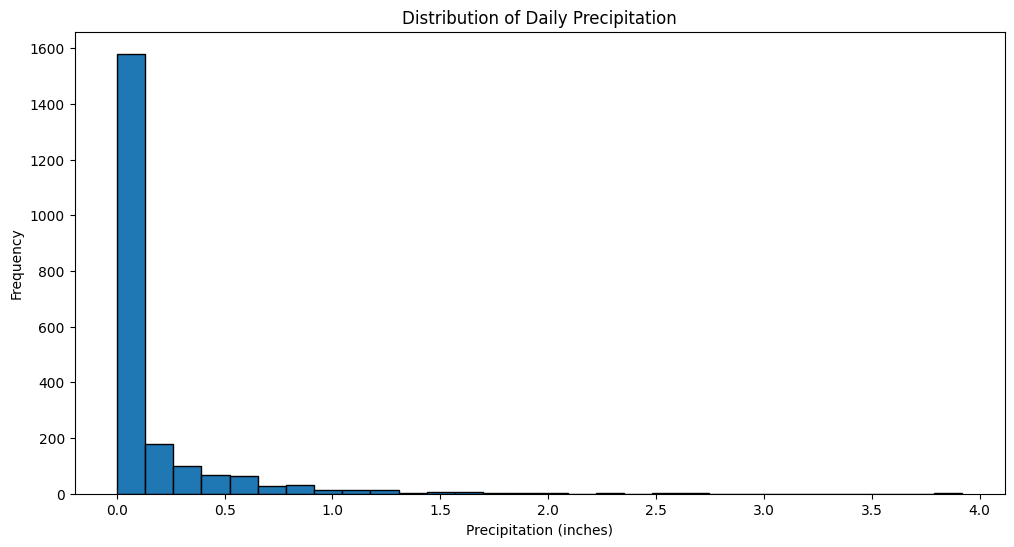

In [35]:
plt.figure(figsize = (12, 6))
plt.hist(df['DailyPrecipitation'].dropna(), bins = 30, edgecolor = 'black')
plt.title('Distribution of Daily Precipitation')
plt.xlabel('Precipitation (inches)')
plt.ylabel('Frequency')
plt.show()

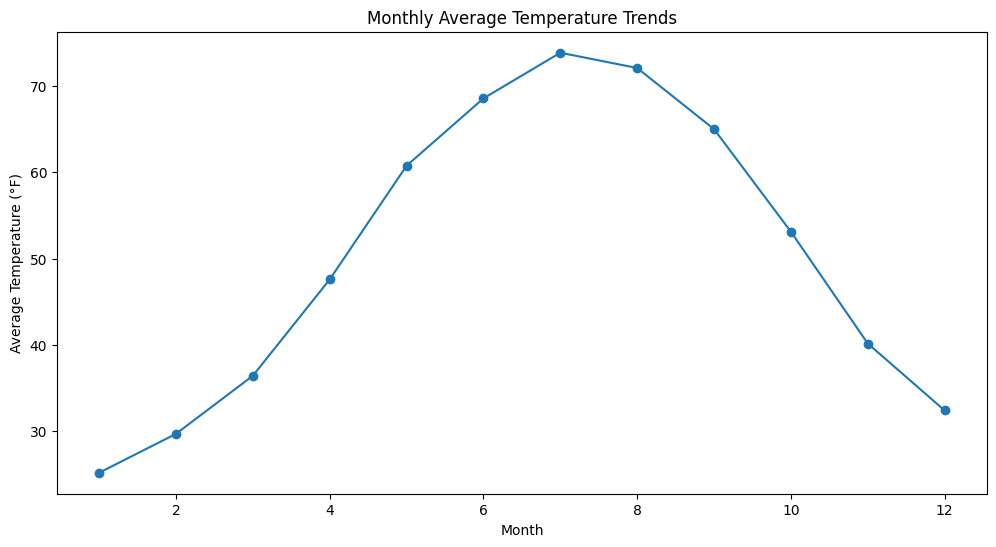

In [37]:
df['Month'] = df['DATE'].dt.month
monthly_temperature = df.groupby('Month')['DailyAverageDryBulbTemperature'].mean()

plt.figure(figsize = (12,6))
plt.plot(monthly_temperature.index, monthly_temperature.values, marker = 'o')
plt.title('Monthly Average Temperature Trends')
plt.xlabel('Month')
plt.ylabel('Average Temperature (°F)')
plt.show()

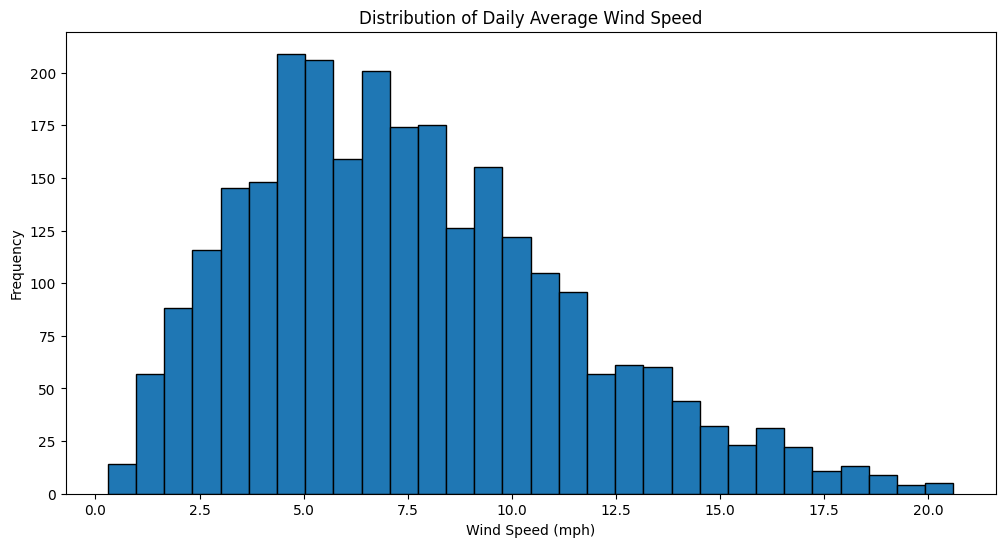

In [38]:
plt.figure(figsize=(12, 6))
plt.hist(df['DailyAverageWindSpeed'].dropna(), bins=30, edgecolor='black')
plt.title('Distribution of Daily Average Wind Speed')
plt.xlabel('Wind Speed (mph)')
plt.ylabel('Frequency')
plt.show()

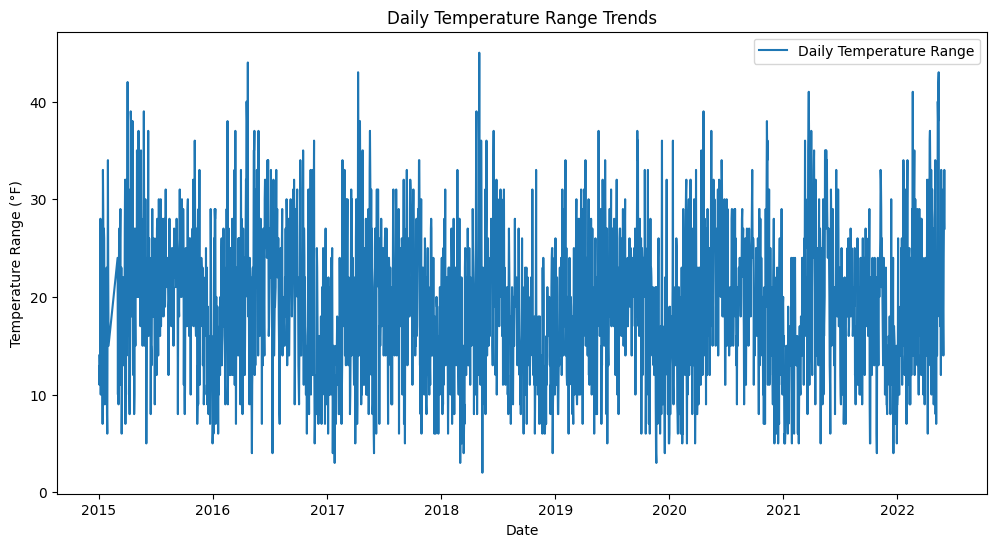

In [39]:
df['TemperatureRange'] = df['DailyMaximumDryBulbTemperature'] - df['DailyMinimumDryBulbTemperature']
plt.figure(figsize=(12, 6))
plt.plot(df['DATE'], df['TemperatureRange'], label='Daily Temperature Range')
plt.title('Daily Temperature Range Trends')
plt.xlabel('Date')
plt.ylabel('Temperature Range (°F)')
plt.legend()
plt.show()

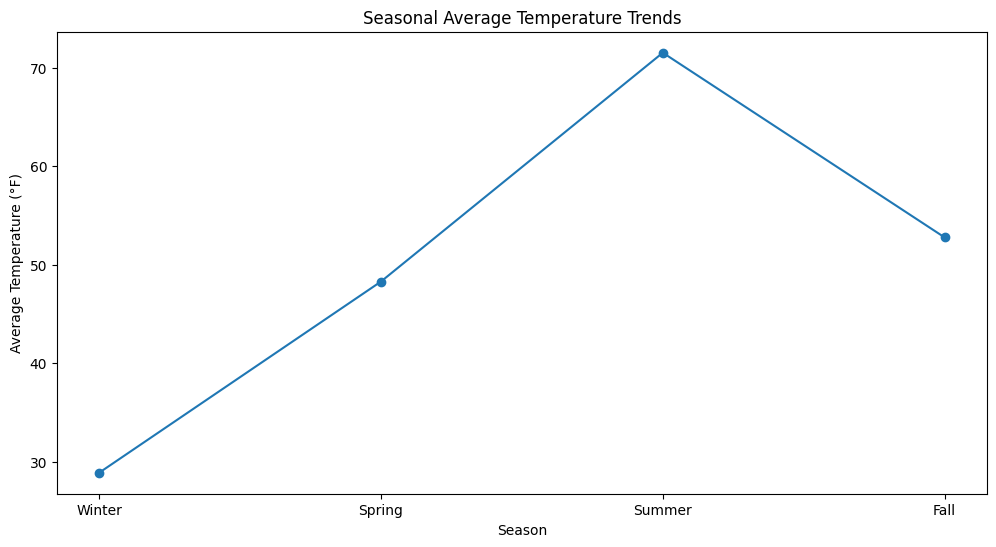

In [41]:
df['Season'] = (df['DATE'].dt.month % 12 + 3) // 3
seasonal_temperature = df.groupby('Season')['DailyAverageDryBulbTemperature'].mean()

plt.figure(figsize=(12, 6))
plt.plot(seasonal_temperature.index, seasonal_temperature.values, marker='o')
plt.title('Seasonal Average Temperature Trends')
plt.xlabel('Season')
plt.ylabel('Average Temperature (°F)')
plt.xticks([1, 2, 3, 4], ['Winter', 'Spring', 'Summer', 'Fall'])
plt.show()

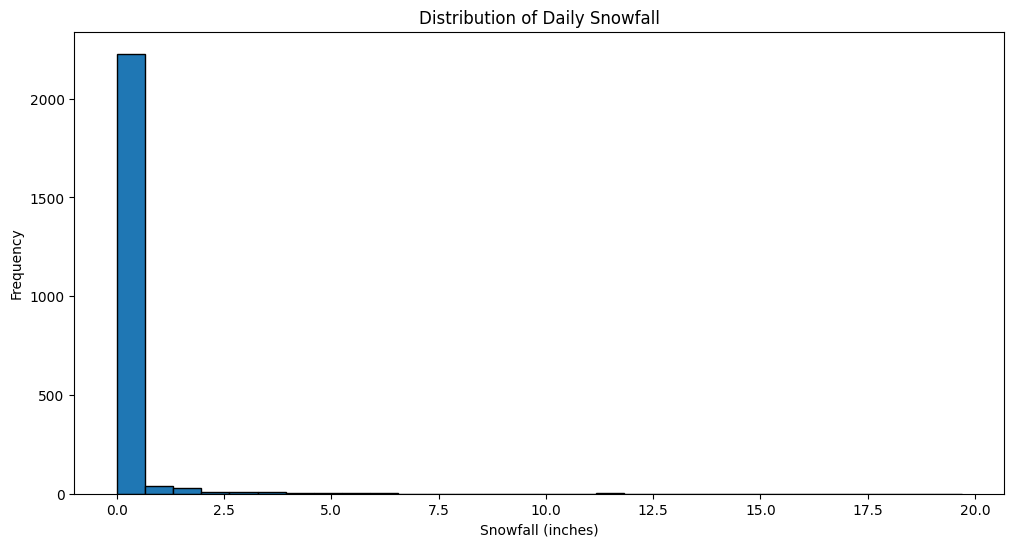

In [42]:
plt.figure(figsize=(12, 6))
plt.hist(df['DailySnowfall'].dropna(), bins=30, edgecolor='black')
plt.title('Distribution of Daily Snowfall')
plt.xlabel('Snowfall (inches)')
plt.ylabel('Frequency')
plt.show()

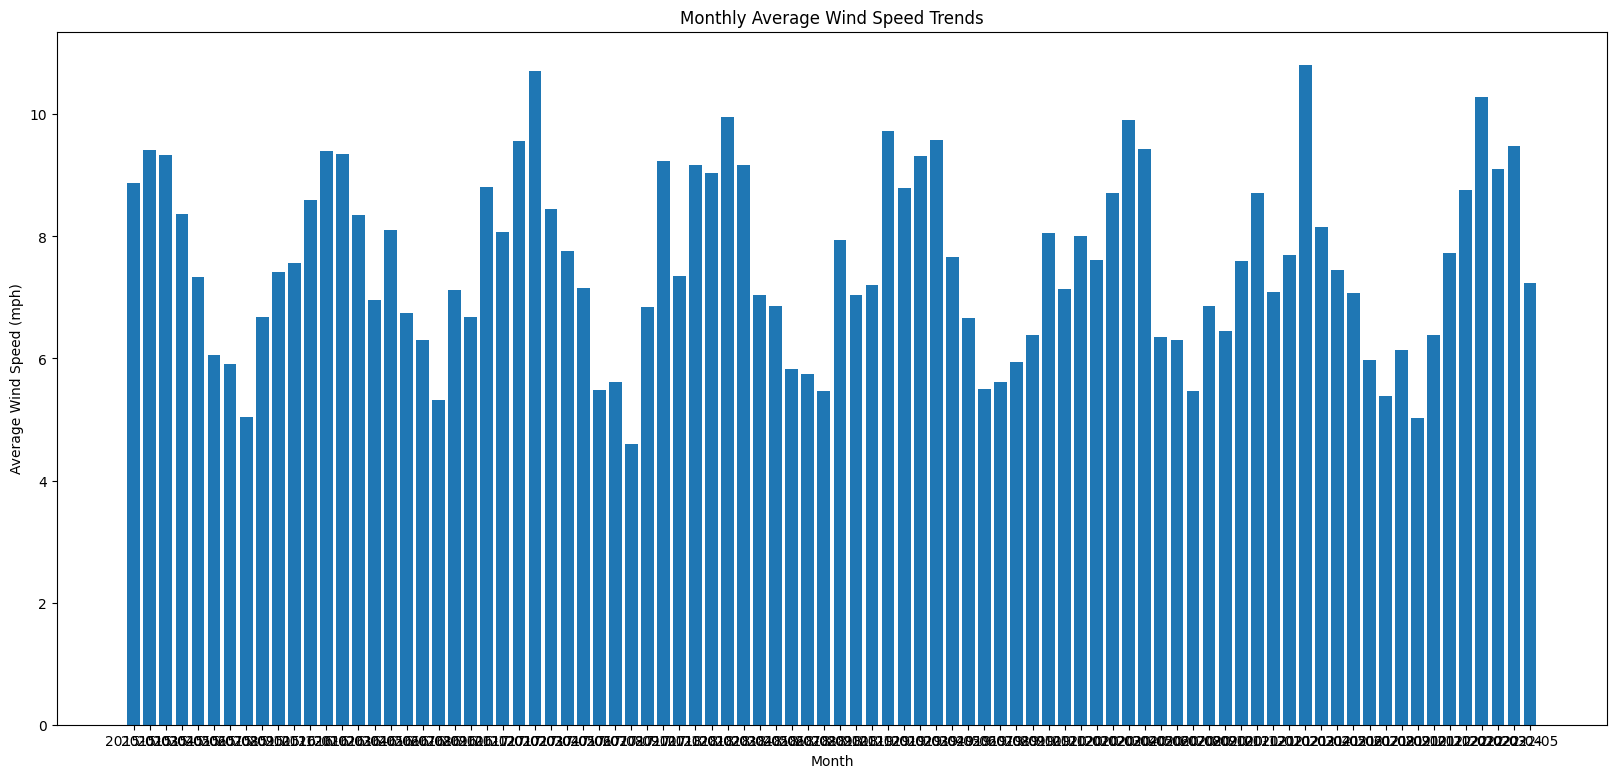

In [47]:
monthly_wind_speed = df.groupby(df['DATE'].dt.to_period("M"))['DailyAverageWindSpeed'].mean()

plt.figure(figsize=(20, 9))
plt.bar(monthly_wind_speed.index.astype(str), monthly_wind_speed.values)
plt.title('Monthly Average Wind Speed Trends')
plt.xlabel('Month')
plt.ylabel('Average Wind Speed (mph)')
plt.show()

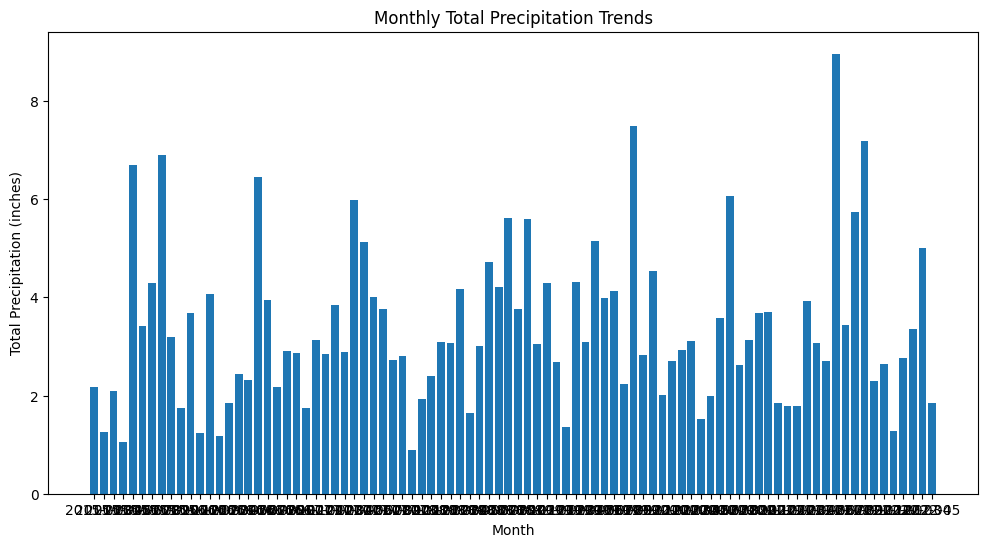

In [48]:
monthly_precipitation = df.groupby(df['DATE'].dt.to_period("M"))['DailyPrecipitation'].sum()

plt.figure(figsize=(12, 6))
plt.bar(monthly_precipitation.index.astype(str), monthly_precipitation.values)
plt.title('Monthly Total Precipitation Trends')
plt.xlabel('Month')
plt.ylabel('Total Precipitation (inches)')
plt.show()

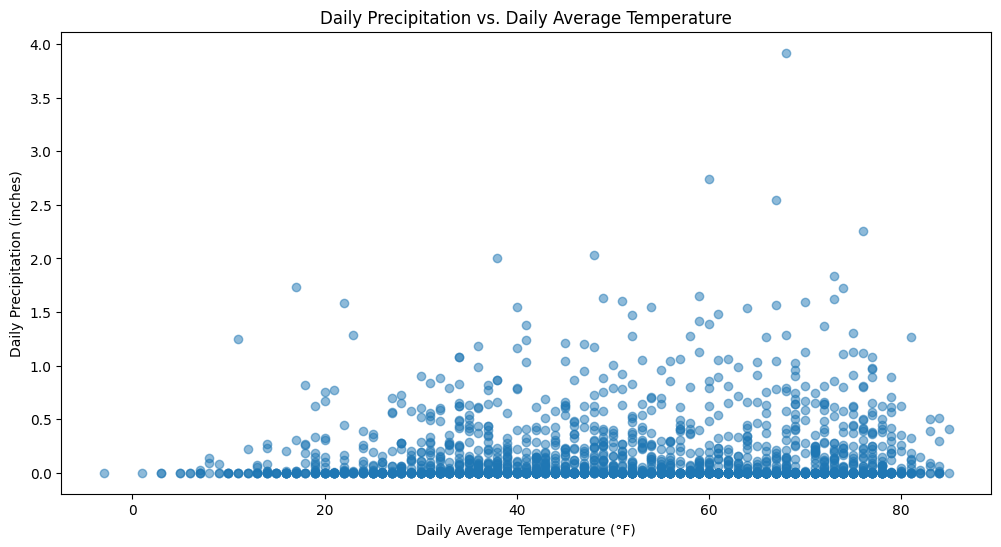

In [50]:
plt.figure(figsize=(12, 6))
plt.scatter(df['DailyAverageDryBulbTemperature'], df['DailyPrecipitation'], alpha=0.5)
plt.title('Daily Precipitation vs. Daily Average Temperature')
plt.xlabel('Daily Average Temperature (°F)')
plt.ylabel('Daily Precipitation (inches)')
plt.show()